In [1]:
%matplotlib inline
import pandas as pd

from sklearn.model_selection import StratifiedKFold
#決定木用
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve

from IPython.display import display
df_data =pd.read_csv("../../1_data/HR_comma_sep.csv")
df_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
#欠測値のカウント
df_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

df_data.describe()
<div align='center'>
    <h2>各指標の説明</h2>
</div>
<ul>
    <li>satisfaction_level 満足度（0-1）数値</li>
    <li>last_evaluation 前回のパフォーマンス評価からの経過時間（年） 数値</li>
    <li>number_project 仕事中に完了したプロジェクトの数 数値</li>
    <li>average_montly_hours 職場での月平均時間 数値</li>
    <li>time_spend_company 会社で過ごした年数 数値</li>
    <li>Work_accident 従業員が職場で事故を起こしたかどうか 数値</li>
    <li>left 従業員が職場を離れたかどうか（1または0）要因 数値</li>
    <li>promotion_last_5years 過去5年間に従業員が昇進したかどうか 数値</li>
    <li>sales 彼らが働く部署文字列</li>
    <li>salary 相対的な給与水準（高い）文字列</li>
</ul>

In [3]:
print(set(df_data['salary'].values))
df_data['salary_level'] = 0
df_data.loc[df_data['salary']=='high','salary_level'] = 3
df_data.loc[df_data['salary']=='medium','salary_level'] = 2
df_data.loc[df_data['salary']=='low','salary_level'] = 1
print(df_data.groupby('salary_level').size())

{'medium', 'low', 'high'}
salary_level
1    7316
2    6446
3    1237
dtype: int64


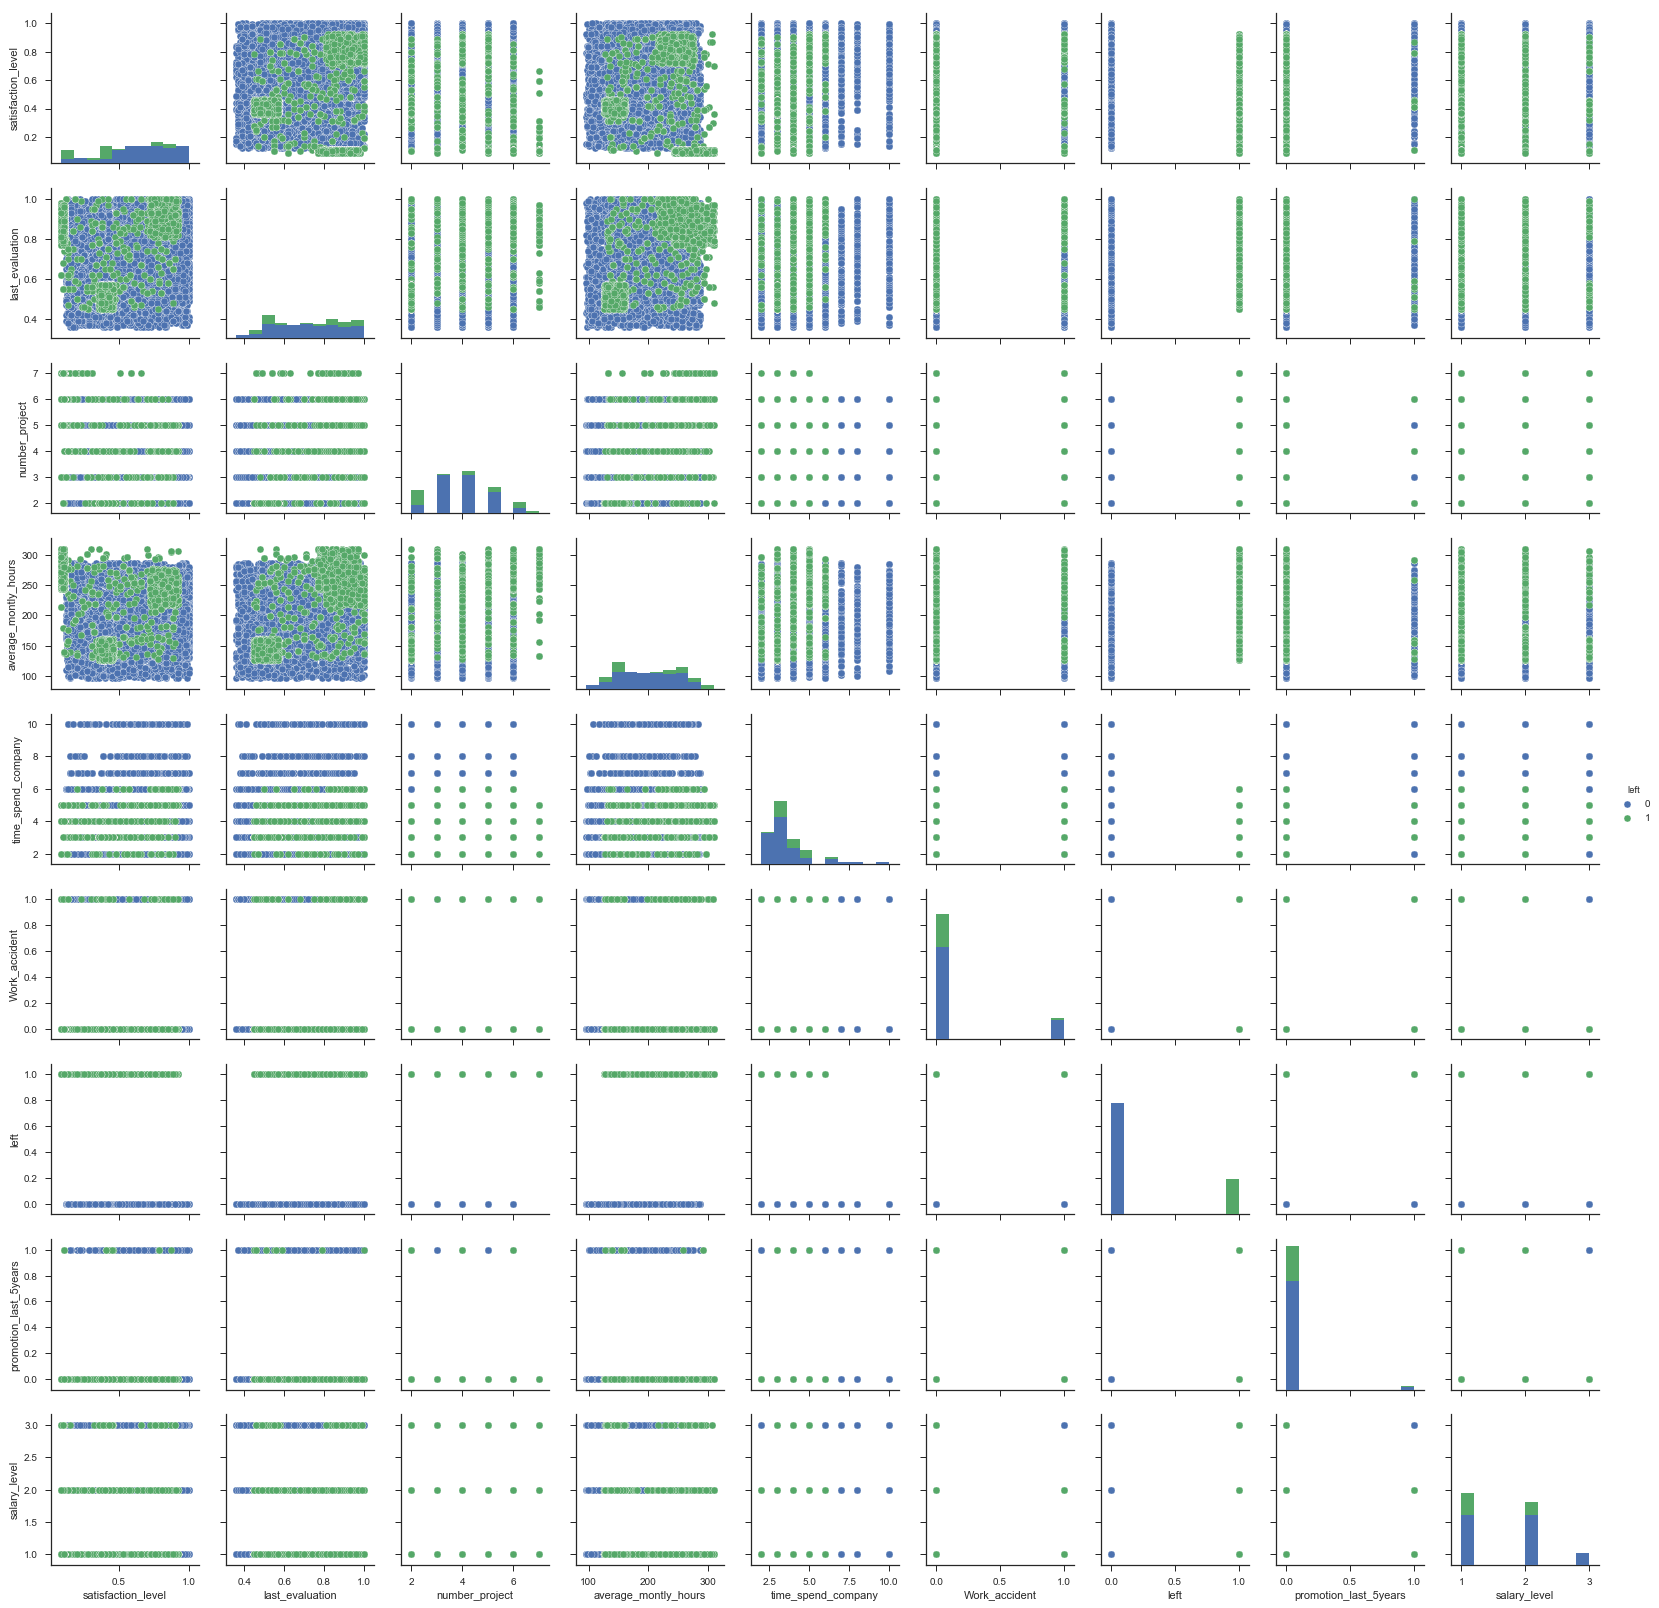

In [4]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df_data, hue="left")

In [5]:
df_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_level'],
      dtype='object')

In [6]:
#離職したものと 分ける
df_data_left = df_data[df_data['left']==1].copy()
df_data_non_left = df_data[df_data['left']==0].copy()

In [7]:
df_data_left.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [8]:
df_data_non_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level
2000,0.58,0.74,4,215,3,0,0,0,sales,low,1
2001,0.82,0.67,2,202,3,0,0,0,sales,low,1
2002,0.45,0.69,5,193,3,0,0,0,sales,low,1
2003,0.78,0.82,5,247,3,0,0,0,sales,low,1
2004,0.49,0.60,3,214,2,0,0,0,sales,low,1


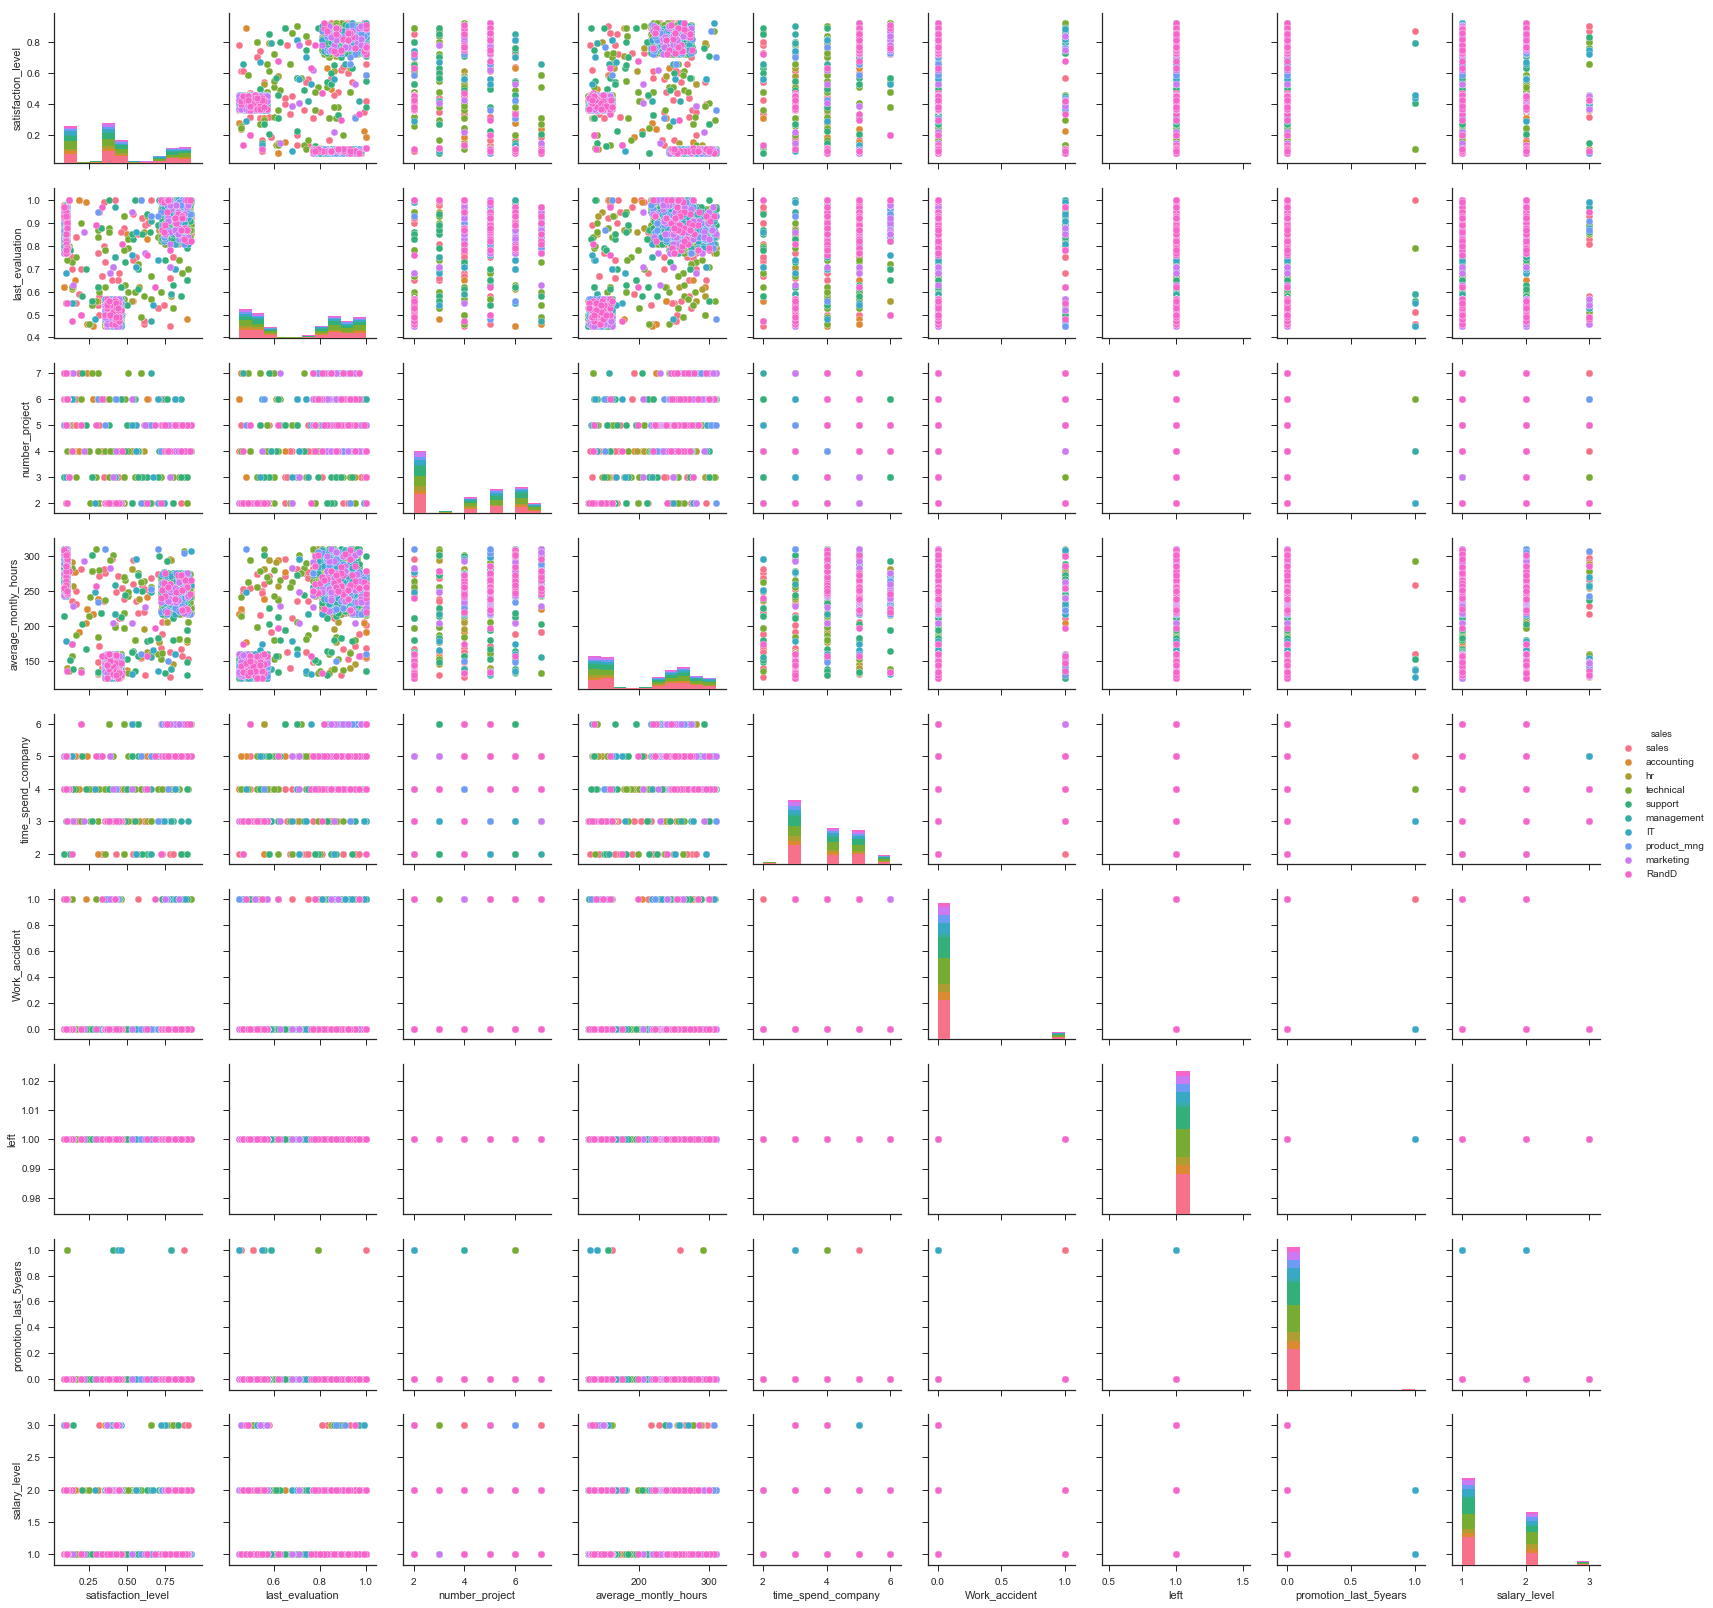

In [9]:
# 離職者の相関をみる
sns.pairplot(df_data_left, hue="sales")

In [29]:
df_data_left = df_data[df_data['left']==1].copy()
df_data_left.columns
del df_data_left[ 'Work_accident']
del df_data_left[ 'left']
# del df_data_left[ 'promotion_last_5years']
del df_data_left['salary']
# del df_data_left[ 'salary_level']
df_data_left.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,sales,salary_level
0,0.38,0.53,2,157,3,0,sales,1
1,0.80,0.86,5,262,6,0,sales,2
2,0.11,0.88,7,272,4,0,sales,2
3,0.72,0.87,5,223,5,0,sales,1
4,0.37,0.52,2,159,3,0,sales,1


- satisfaction_level 満足度（0-1）数値 -  
- last_evaluation 前回のパフォーマンス評価からの経過時間（年） 数値  
- number_project 仕事中に完了したプロジェクトの数 数値  
- average_montly_hours 職場での月平均時間 数値  
- time_spend_company 会社で過ごした年数 数値  
- Work_accident 従業員が職場で事故を起こしたかどうか 数値  
- left 従業員が職場を離れたかどうか（1または0）要因 数値 
- promotion_last_5years 過去5年間に従業員が昇進したかどうか 数値  
- sales 彼らが働く部署文字列  
- salary 相対的な給与水準（高い）文字列  

In [10]:
#職業別の離職者を確認する離職したものと 分ける
# 
df_data['sales_IT'] = 0
df_data['sales_RandD'] = 0
df_data['sales_accounting'] = 0
df_data['sales_hr'] = 0
df_data['sales_management'] = 0
df_data['sales_marketing'] = 0
df_data['sales_product_mng'] = 0
df_data['sales_sales'] = 0
df_data['sales_support'] = 0
df_data['sales_technical'] = 0
df_data.loc[df_data['sales']=='IT','sales_IT'] = 1
df_data.loc[df_data['sales']=='RandD','sales_RandD'] = 1
df_data.loc[df_data['sales']=='accounting','sales_accounting'] = 1
df_data.loc[df_data['sales']=='hr','sales_hr'] = 1
df_data.loc[df_data['sales']=='management','sales_management'] = 1
df_data.loc[df_data['sales']=='marketing','sales_marketing'] = 1
df_data.loc[df_data['sales']=='product_mng','sales_product_mng'] = 1
df_data.loc[df_data['sales']=='sales','sales_sales'] = 1
df_data.loc[df_data['sales']=='support','sales_support'] = 1
df_data.loc[df_data['sales']=='technical','sales_technical'] = 1
df_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


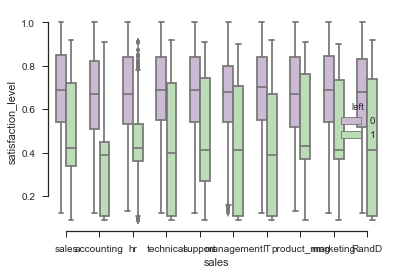

In [11]:
# 職業毎の満足度　緑がleft
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x='sales', y='satisfaction_level', hue='left', data=df_data, palette="PRGn", width=0.6)
sns.despine(offset=1, trim=True)

- 

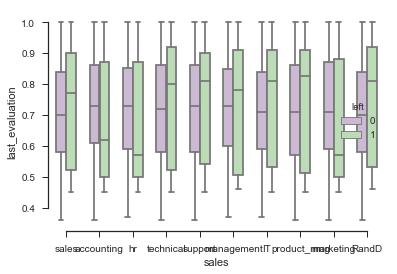

In [12]:
# 職業毎の前回のパフォーマンス評価からの経過時間（年）　緑がleft
sns.boxplot(x='sales', y='last_evaluation', hue='left', data=df_data, palette="PRGn", width=0.6)
sns.despine(offset=1, trim=True)

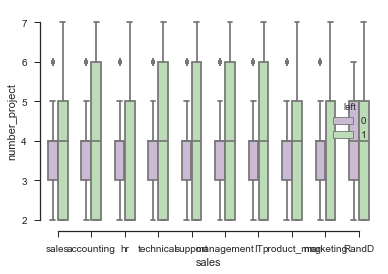

In [13]:
# 職業毎のnumber_project 仕事中に完了したプロジェクトの数　緑がleft
sns.boxplot(x='sales', y='number_project', hue='left', data=df_data, palette="PRGn", width=0.6)
sns.despine(offset=1, trim=True)

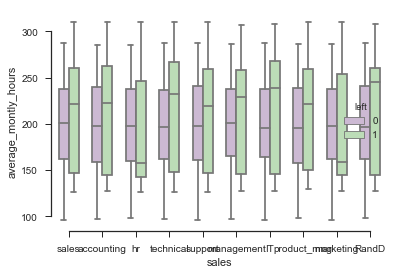

In [14]:
# 職業毎のaverage_montly_hours 職場での月平均時間　緑がleft
sns.boxplot(x='sales', y='average_montly_hours', hue='left', data=df_data, palette="PRGn", width=0.6)
sns.despine(offset=1, trim=True)

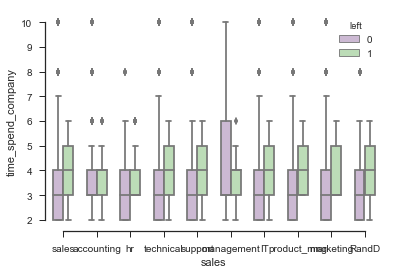

In [15]:
# 職業毎の# time_spend_company 会社で過ごした年数　緑がleft
sns.boxplot(x='sales', y='time_spend_company', hue='left', data=df_data, palette="PRGn", width=0.6)
sns.despine(offset=1, trim=True)

下ブレしている

In [17]:
#過去5年間に従業員が昇進したかどうか
df_data.groupby('promotion_last_5years').size()

promotion_last_5years
0    14680
1      319
dtype: int64

In [39]:
# ↑相関図で見た上と下のやめる人が多いのが出ている

In [41]:
# ↑相関図で見た上と下のやめる人が多いのが出ている

In [43]:
# ↑相関図で見た上と下のやめる人が多いのが出ている

In [20]:
df_data.groupby('sales').size()


sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'

*** ここでの気づき***   
* 下記項目最低層は離職していない   
'last_evaluation'  
'average_montly_hours'  <br>  
* 下記項目の最高層は離職していない   
'satisfaction_level'  


# 下記数値が相関が高い
前回の評価が良い人　
プロジェクトの数の関わりが大きい人
月の労働時間
会社で過ごした年数
＊どれも低値と高値が多く、中間層が少ない
＊年齢の数値も欲しい

In [45]:
#management以外はやめる傾向にある

## 図を眺めての初感
***下記項目がleftと相関が高い***  
*・前回の評価が良い人　*  
*・プロジェクトの数の関わりが大きい人*  
*・月の労働時間*  
*・会社で過ごした年数*  
*そしてどれも低値と高値が多く、中間層が少ない*  

***下記項目最低層は離職していない***  
'last_evaluation'  
'average_montly_hours'    
***下記項目の最高層は離職していない***    
'satisfaction_level'  

***その他***  
経歴が長くなるとmanagement以外はやめる傾向にある  
満足度は相対的に離職者の方が低く出た。  
特にsales_accounting（会計）,  
sales_technical（テクニカル）,  
sales_management（管理職）,  
sales_IT（IT技術者）,  
sales_RandD(研究開発)  

In [23]:
df_data.groupby(['sales','left']).size()

sales        left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
dtype: int64

In [47]:
import scipy.stats as stats
import numpy as np

In [48]:
df_data_left.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_level', 'sales_IT',
       'sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management',
       'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support',
       'sales_technical'],
      dtype='object')

***satisfaction_level*** 満足度（0-1）数値  
***last_evaluation*** 前回のパフォーマンス評価からの経過時間（年） 数値  
*** number_project*** 仕事中に完了したプロジェクトの数 数値  
*** average_montly_hours*** 職場での月平均時間 数値  
*** time_spend_company*** 会社で過ごした年数 数値  
*** Work_accident*** 従業員が職場で事故を起こしたかどうか 数値  
*** left*** 従業員が職場を離れたかどうか（1または0）要因 数値  
*** promotion_last_5years*** 過去5年間に従業員が昇進したかどうか 数値  
*** sales*** 彼らが働く部署文字列  
*** salary*** 相対的な給与水準（高い）文字列

In [53]:
# dfwkdata['IT'] = df_data_left.groupby('')/df_data

## 図を眺めての初感
***下記項目がleftと相関が高い***  
*・前回の評価が良い人　*  
*・プロジェクトの数の関わりが大きい人*  
*・月の労働時間*  
*・会社で過ごした年数*  
*そしてどれも低値と高値が多く、中間層が少ない*  

***下記項目最低層は離職していない***  
'last_evaluation'  
'average_montly_hours'    
***下記項目の最高層は離職していない***    
'satisfaction_level'  

***その他***  
経歴が長くなるとmanagement以外はやめる傾向にある  
満足度は相対的に離職者の方が低く出た。  
特にsales_accounting（会計）,  
sales_technical（テクニカル）,  
sales_management（管理職）,  
sales_IT（IT技術者）,  
sales_RandD(研究開発)  

In [54]:
df_data_tree = df_data.copy()
df_data_tree.head()
df_data_tree.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'salary_level', 'sales_IT',
       'sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management',
       'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support',
       'sales_technical'],
      dtype='object')

In [55]:
df_data_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df_data_tree = df_data.copy()
del df_data_tree['sales']
del df_data_tree['salary']
del df_data_tree['sales_IT']
del df_data_tree['sales_RandD']
del df_data_tree['sales_accounting']
del df_data_tree['salary_level']
del df_data_tree['sales_hr']
del df_data_tree['sales_management']
del df_data_tree['sales_marketing']
del df_data_tree['sales_product_mng']
del df_data_tree['sales_sales']
del df_data_tree['sales_support']
del df_data_tree['sales_technical']
df_data_tree.head()

KeyError: 'sales_IT'

・前回の評価が良い人　
・プロジェクトの数の関わりが大きい人
・月の労働時間
・会社で過ごした年数

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# import numpy as np 
# from mlxtend.plotting import plot_decision_regions

In [77]:
features_name= ['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company']
variables = df_data_tree[features_name].values

X = df_data_tree[features_name]
y = df_data_tree['left']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(train_X,train_y)
clf.score(test_X,test_y)

0.95133333333333336

In [66]:
predicted = clf.predict(test_X)


In [67]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

y_true = test_y
# y_pred = df_re["satisfaction_level","number_project","average_montly_hours","time_spend_company"]
y_pred = predicted

# Accuracy(正解率)
print("Accuracy",accuracy_score(y_true, y_pred).round(2))

# Recall(再現率) color=1(離職者)をPositive(知りたい方)に設定した場合
rec = recall_score(y_true, y_pred, pos_label=1).round(2)
print("Recall(pos_label=1)",rec)

# Recall(再現率) color=0(非離職者)をPositive(知りたい方)に設定した場合
rec = recall_score(y_true, y_pred, pos_label=0).round(2)
print("Recall(pos_label=0)",rec)

# Precision(適合率)　color=1(離職者))をPositive(知りたい方)に設定した場合
pre = precision_score(y_true, y_pred, pos_label=1).round(2)
print("Precision, pos_label=1", pre)

# Precision(適合率)　color=0(非離職者)をPositive(知りたい方)に設定した場合
pre = precision_score(y_true, y_pred, pos_label=0).round(2)
print("Precision, pos_label=0", pre)

Accuracy 0.94
Recall(pos_label=1) 0.92
Recall(pos_label=0) 0.95
Precision, pos_label=1 0.86
Precision, pos_label=0 0.97


In [71]:
predicted = clf.predict(train_X)
predicted

array([0, 0, 1, ..., 0, 1, 0])

In [80]:
y.index

RangeIndex(start=0, stop=14999, step=1)

In [81]:
X.index

RangeIndex(start=0, stop=14999, step=1)

In [86]:
skf = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # ラベル割合が概ね等しくなっていることを確認
    display(pd.DataFrame(y_train, columns=["left"]).groupby("left")["left"].count())
    display(pd.DataFrame(y_test, columns=["left"]).groupby("left")["left"].count())

TRAIN: [    1     3     4 ..., 14994 14995 14997] TEST: [    0     2    11 ..., 14989 14996 14998]


left
0    9142
1    2856
Name: left, dtype: int64

left
0    2286
1     715
Name: left, dtype: int64

TRAIN: [    0     2     3 ..., 14996 14997 14998] TEST: [    1     4     6 ..., 14963 14973 14982]


left
0    9142
1    2857
Name: left, dtype: int64

left
0    2286
1     714
Name: left, dtype: int64

TRAIN: [    0     1     2 ..., 14996 14997 14998] TEST: [   17    18    24 ..., 14986 14992 14995]


left
0    9142
1    2857
Name: left, dtype: int64

left
0    2286
1     714
Name: left, dtype: int64

TRAIN: [    0     1     2 ..., 14996 14997 14998] TEST: [    5     7     8 ..., 14983 14990 14994]


left
0    9143
1    2857
Name: left, dtype: int64

left
0    2285
1     714
Name: left, dtype: int64

TRAIN: [    0     1     2 ..., 14995 14996 14998] TEST: [    3    10    15 ..., 14991 14993 14997]


left
0    9143
1    2857
Name: left, dtype: int64

left
0    2285
1     714
Name: left, dtype: int64

In [70]:
from sklearn.tree import export_graphviz
import pydot_ng as pydot
from IPython.display import SVG

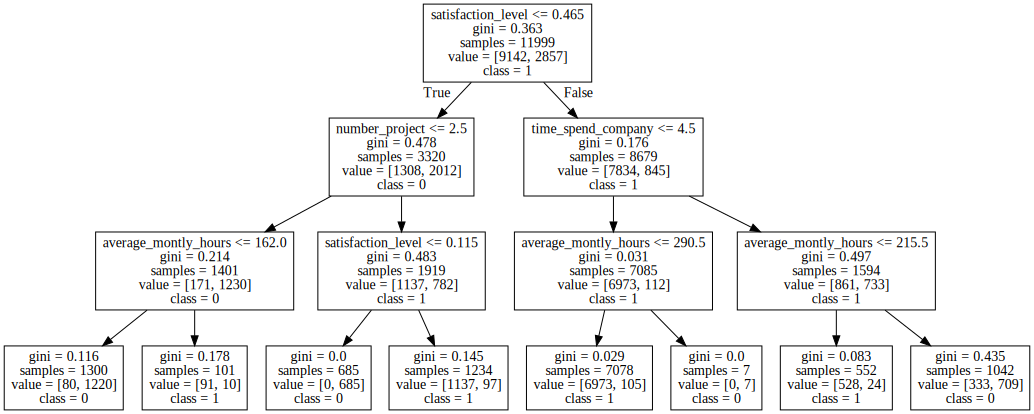

In [47]:
#### dot data を作成し、
dot_data = pydot.graph_from_dot_data(export_graphviz(clf,
                                                     out_file=None,
                                                     class_names=target,
                                                     feature_names=features_name))

# dot_dataから SVG データを生成し、Jupyter の表示用関数でSVG表示
SVG(dot_data.create(prog='dot', format='svg'))


satisfaction_level (満足度)<= 0.465

True>
number_project (プロジェクト数)<= 2.5

True>True>　
average_montly_hoursa(職場での月平均時間) <= 162.0

True>False>　
satisfaction_level (満足度)<= 0.115

False>
time_spend_company（会社で過ごした年数） <= 4.5

False>True>
average_montly_hours(職場での月平均時間) <= 290.5

False>True>
average_montly_hours(職場での月平均時間) <= 215.5

***last_evaluation*** 前回のパフォーマンス評価からの経過時間（年） 数値  
*** number_project*** 仕事中に完了したプロジェクトの数 数値  
*** average_montly_hours*** 職場での月平均時間 数値  
*** time_spend_company*** 会社で過ごした年数 数値  
*** Work_accident*** 従業員が職場で事故を起こしたかどうか 数値  
*** left*** 従業員が職場を離れたかどうか（1または0）要因 数値  
*** promotion_last_5years*** 過去5年間に従業員が昇進したかどうか 数値  
*** sales*** 彼らが働く部署文字列  
*** salary*** 相対的な給与水準（高い）文字列

In [39]:
#ファイル出力する
dot_data.write_jpeg('filename5.jpg', prog='dot')

True

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

### 感じとして
全体として相関関係ない

### satisfaction_level 満足度（0-1）
満足度が高ければ離職率しない
満足度が低く、評価も低い人　離職しない

### last_evaluation 前回のパフォーマンス評価からの経過時間（年） 
満足度が高ければ離職しない
他なし

### number_project 仕事中に完了したプロジェクトの数 
満足度が高ければ離職しない
他なし

### average_montly_hours 職場での月平均時間 
満足度が高ければ離職しない
労働時間が多いほどやめない

### time_spend_company 会社で過ごした年数 
満足度が高ければ離職しない
年数が長いとやめない

### Work_accident 従業員が職場で事故を起こしたかどうか 

### left 従業員が職場を離れたかどうか（1または0）要因　相対的 

### promotion_last_5years 過去5年間に従業員が昇進したかどうか 
昇進した人はやめていない
昇進した人の満足度は高い
前回評価も高い

### sales 彼らが働く部署
### salary 相対的な給与水準（高い）

In [8]:
#混同行列
df_cross = pd.crosstab(df_data["left"],df_data["sales"], margins=True)
# df_cross = df_cross.loc[[1,0,"All"],[1,0,"All"]]#並べ替え
# df_cross.rename(columns={1:"1(白)", 0:"0(紫)"}, index={1:"1(白)",0:"0(紫)"}, inplace=True)
df_cross

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
left,,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023,11428
1,273,121,204,215,91,203,198,1014,555,697,3571
All,1227,787,767,739,630,858,902,4140,2229,2720,14999


In [10]:
df_cross = pd.crosstab(df_data["salary"],df_data["sales"], margins=True)
df_cross

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
salary,,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201,1237
low,609,364,358,335,180,402,451,2099,1146,1372,7316
medium,535,372,335,359,225,376,383,1772,942,1147,6446
All,1227,787,767,739,630,858,902,4140,2229,2720,14999


' IT',  ITエンジニア　　
' RandD'  研究開発　　
' accounting'　　経理  
' hr' 人事 
' management'管理  
' marketing'マーケティング  
' product_mng'  プロジェクトマネージャー
' sales'  営業
' support'  サポート
' technical'　技術

In [34]:
df_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
df_re = df_data.copy()

y_true = df_re["left"]
# y_pred = df_re["satisfaction_level","number_project","average_montly_hours","time_spend_company"]
y_pred = df_re["satisfaction_level"]

# Accuracy(正解率)
print("Accuracy",accuracy_score(y_true, y_pred).round(2))

# Recall(再現率) color=1(白)をPositive(知りたい方)に設定した場合
rec = recall_score(y_true, y_pred, pos_label=1).round(2)
print("Recall(pos_label=1)",rec)

# Recall(再現率) color=0(紫)をPositive(知りたい方)に設定した場合
rec = recall_score(y_true, y_pred, pos_label=0).round(2)
print("Recall(pos_label=0)",rec)

# Precision(適合率)　color=1(白)をPositive(知りたい方)に設定した場合
pre = precision_score(y_true, y_pred, pos_label=1).round(2)
print("Precision, pos_label=1", pre)

# Precision(適合率)　color=0(紫)をPositive(知りたい方)に設定した場合
pre = precision_score(y_true, y_pred, pos_label=0).round(2)
print("Precision, pos_label=0", pre)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [19]:
set(df_data['sales'].values)

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

***last_evaluation*** 前回のパフォーマンス評価からの経過時間（年） 数値  
*** number_project*** 仕事中に完了したプロジェクトの数 数値  
*** average_montly_hours*** 職場での月平均時間 数値  
*** time_spend_company*** 会社で過ごした年数 数値  
*** Work_accident*** 従業員が職場で事故を起こしたかどうか 数値  
*** left*** 従業員が職場を離れたかどうか（1または0）要因 数値  
*** promotion_last_5years*** 過去5年間に従業員が昇進したかどうか 数値  
*** sales*** 彼らが働く部署文字列  
*** salary*** 相対的な給与水準（高い）文字列

In [14]:
df_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")



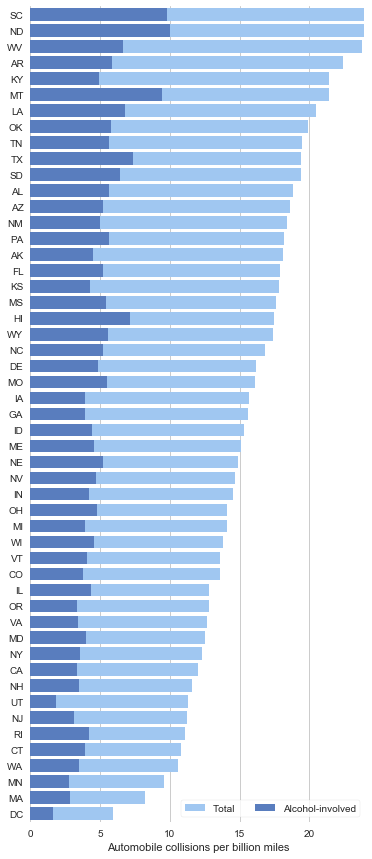

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
# matplotlibの図形を初期化する
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)